# Mod 7 CS I

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Problem 1. 
"""We will use acoustic features to distinguish a male voice from female. Load the
dataset from “voice.csv”, identify the target variable and do a one-hot encoding
for the same. Split the dataset in train-test with 20% of the data kept aside for
testing.
[Hint: Refer to LabelEncoder documentation in scikit-learn]"""

data = pd.read_csv("../demo/voice.csv", header=0)
data.shape

(3168, 21)

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
#Dependent Variable
X = data.drop(["label"], axis=1)
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [7]:
#Target Variable
y = data.label
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [8]:
# Encoding the target variable using OneHotEncoding

#One_Hot encoding is preferred over LabelEncoding as there is less number of categorical features and the categorical feature is not ordinal.
#https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(integer_encoded, categories='auto',sparse=False,drop='first') #Dropping the first column or the Dummy variable column
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

[1 1 1 ... 0 0 0]
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
['female']


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in Num

In [9]:
#Splitting the data in train-test with 20% of the data kept aside for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, onehot_encoded, test_size=0.2, random_state=30)

In [10]:
#2. Fit a logistic regression model and measure the accuracy on the test set.
#[Hint: Refer to Linear Models section in scikit-learn]
from sklearn.linear_model import LogisticRegression as logReg
log_reg = logReg().fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [11]:
print(f"Coeff: {log_reg.coef_}")
print(f"Intercept: {log_reg.intercept_}")

Coeff: [[-5.97039938e-01  1.50144302e+00 -1.26326786e+00 -5.27526253e+00
   2.89486989e+00  8.17013241e+00 -4.48307742e-01  1.33793090e-02
   4.62816189e+00 -5.76389735e-01  6.73751188e-01 -5.97039938e-01
  -1.67567501e+01  1.37619140e-01 -2.26733880e+00 -1.48282345e-01
  -8.45728764e-01 -4.37438932e-01  4.08289832e-01 -4.04099820e-01]]
Intercet: [-0.00089238]


In [12]:
#Predicting the data
y_pred = log_reg.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [13]:
import sklearn.metrics as metrics
print(f"The Mean Absolute Error for the testing data is : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"The Mean Squared Error  for the testing data is : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"The Root Mean Squared Error for the testing data is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

The Mean Absolute Error for the testing data is : 0.09305993690851735
The Mean Squared Error  for the testing data is : 0.09305993690851735
The Root Mean Squared Error for the testing data is : 0.30505726824404195


In [14]:
#Printing the Accuracy score of Case 1
score1 = metrics.accuracy_score(y_pred, y_test)
print(f"Accuracy Score of First Case: {score1}")

Accuracy Score of First Case: 0.9069400630914827


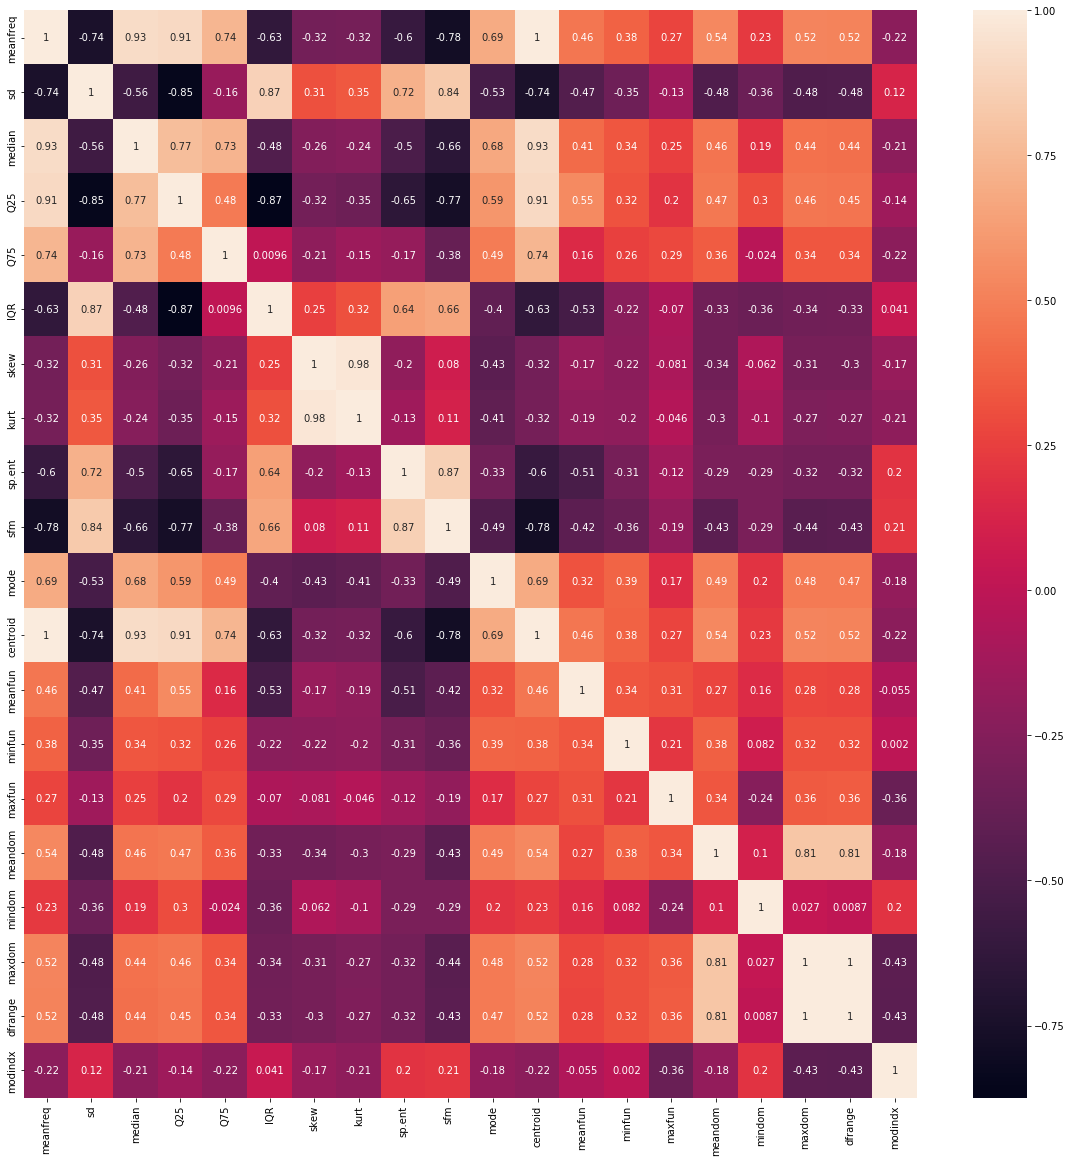

In [15]:
#Problem 3:
"""3. Compute the correlation matrix that describes the dependence between all predictors and 
identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate method]"""

corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [16]:
"""4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.
[Hint: Identify correlated variable pairs and remove one among them]"""

#Keeing the strong correlated columns (Above 90%)
"""
"meanfreq" -> "centroid", "median", "Q25"
"Q25" -> "centroid"
"median" -> "centroid"
"skew" -> "kurt"
"dfrange" -> "maxdom"
"""

#Removing Multicollinearity
X_new = X.drop(["centroid", "median", "Q25", "skew", "dfrange"], axis=1)
X_new.head()

,meanfreq,sd,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx
0,0.059781,0.064241,0.090193,0.075122,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000
1,0.066009,0.067310,0.092666,0.073252,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632
2,0.077316,0.083829,0.131908,0.123207,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512
3,0.151228,0.072111,0.207955,0.111374,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119
4,0.135120,0.079146,0.206045,0.127325,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274


In [17]:
#Splitting the data in train-test with 20% of the data kept aside for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, onehot_encoded, test_size=0.2, random_state=30)

In [18]:
#2. Fit a logistic regression model and measure the accuracy on the test set.
#[Hint: Refer to Linear Models section in scikit-learn]
from sklearn.linear_model import LogisticRegression as logReg
log_reg = logReg().fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print(f"Coeff: {log_reg.coef_}")
print(f"Intercet: {log_reg.intercept_}")

Coeff: [[-1.54480640e+00  1.65687722e+00  2.58139822e+00  1.02612196e+01
  -4.49928399e-04  4.52130949e+00  3.94214285e-01  8.15694906e-01
  -1.74752023e+01  3.30633349e-01 -2.41953002e+00 -2.52646641e-02
  -1.73556303e+00 -2.66205756e-02 -6.43411283e-01]]
Intercet: [-2.14916758]


In [20]:
#Predicting the data
y_pred = log_reg.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [21]:
import sklearn.metrics as metrics
print(f"The Mean Absolute Error for the testing data is : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"The Mean Squared Error  for the testing data is : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"The Root Mean Squared Error for the testing data is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

The Mean Absolute Error for the testing data is : 0.08517350157728706
The Mean Squared Error  for the testing data is : 0.08517350157728706
The Root Mean Squared Error for the testing data is : 0.2918449958064847


In [22]:
#Printing the Accuracy score of Case 2
score2 = metrics.accuracy_score(y_pred, y_test)
print(f"Accuracy Score of Second Case: {score2}")

Accuracy Score of Second Case: 0.9148264984227129


In [23]:
#Comparing the Accuracies
print(f"Accuracy Score of First Case: {score1}")
print(f"Accuracy Score of Second Case: {score2}")

Accuracy Score of First Case: 0.9069400630914827
Accuracy Score of Second Case: 0.9148264984227129


# Bottomline, By removing the multicollinearity, the accuracy of the model has increased.